CBOW Implementation

In [1]:
# importing libraries
import numpy as np



In [2]:
# training corpus
training_corpus = [
    "The quick brown fox jumps over the lazy dog.",
    "Natural language processing is a fascinating field.",
    "Machine learning algorithms can learn from data.",
    "Artificial intelligence is transforming many industries.",
    "Deep learning is a subset of machine learning.",
    "Neural networks are inspired by the human brain.",
    "Data scientists analyze large datasets to extract insights.",
    "Python is a popular programming language for data science.",
    "Text mining involves deriving meaningful information from text.",
    "Computers can understand human language through NLP.",
    "Big data technologies handle vast amounts of information.",
    "Cloud computing provides scalable resources on demand.",
    "The internet of things connects everyday devices to the internet.",
    "Robotics involves designing and programming robots.",
    "Augmented reality overlays digital content onto the real world.",
    "Virtual reality immerses users in a simulated environment.",
    "Blockchain technology secures digital transactions.",
    "Cybersecurity is essential to protect data and systems.",
    "Quantum computing promises to revolutionize computation.",
    "Bioinformatics combines biology and data science to understand biological data."
]

In [3]:
# preprocessing the corpus
# splitting the sentenses in words
split_sentence = [sentence.split() for sentence in training_corpus]
vocabulary = set(word.lower().rstrip('.') for sentence in split_sentence for word in sentence)

# storing the vocabulary size and embedding size
vocab_size = len(vocabulary)
embedding_size = 100

print(vocabulary)

{'large', 'technologies', 'designing', 'meaningful', 'in', 'python', 'learn', 'a', 'for', 'protect', 'transforming', 'everyday', 'analyze', 'machine', 'text', 'users', 'from', 'subset', 'vast', 'demand', 'virtual', 'neural', 'fox', 'augmented', 'scalable', 'simulated', 'human', 'deriving', 'over', 'processing', 'deep', 'to', 'science', 'provides', 'of', 'cloud', 'real', 'biological', 'robots', 'brain', 'quantum', 'onto', 'language', 'digital', 'the', 'technology', 'industries', 'devices', 'insights', 'overlays', 'cybersecurity', 'biology', 'many', 'information', 'jumps', 'quick', 'handle', 'datasets', 'dog', 'essential', 'computers', 'world', 'nlp', 'blockchain', 'field', 'immerses', 'are', 'by', 'programming', 'internet', 'big', 'computation', 'promises', 'scientists', 'environment', 'networks', 'bioinformatics', 'combines', 'artificial', 'secures', 'resources', 'robotics', 'understand', 'computing', 'natural', 'things', 'data', 'revolutionize', 'on', 'mining', 'learning', 'fascinatin

In [4]:
# initializing the weight matrix
W1 = np.random.rand(vocab_size,embedding_size)
W2 = np.random.rand(embedding_size,vocab_size)

# creating the word to index map
word2index = {word:i for i,word in enumerate(vocabulary)}
# print(word2index)

In [5]:
# forward function to calculate the output word vector
def forward(context_words):
    encoded_vector = np.mean([W1[word2index[word]] for word in context_words],axis=0)

    output_vector = np.dot(encoded_vector,W2)

    probable_output_word = np.exp(output_vector) / np.sum(np.exp(output_vector))

    return probable_output_word, encoded_vector


In [6]:
# training process
learning_rate = 0.01
epochs = 1000

for epoch in range(epochs):
    total_loss = 0
    for sentence in training_corpus:
        words = sentence.split()
        length = len(words)
        for i,word in enumerate(words):
            context_words = []
            # for context window 2, we ignore the target word at start and end of sentence
            if i==0 or i==1 or i==length-2 or i==length-1:
                continue

            # making the context word list (2 from left and 2 from right of target word)
            context_words.append(words[i-2].lower().rstrip('.'))
            context_words.append(words[i-1].lower().rstrip('.'))
            context_words.append(words[i+1].lower().rstrip('.'))
            context_words.append(words[i+2].lower().rstrip('.'))

            # calling the forward function to predict the output
            predicted_word, encoded_vector = forward(context_words)

            # calculating the total loss in an epoch
            total_loss += -np.log(predicted_word[word2index[word]])

            # calculating error
            error = predicted_word
            error[word2index[word]] -= 1

            # backpropagation
            # gradient loss with respect to the weights of W2
            dw2 = np.outer(encoded_vector,error)

            # gradient for weights W1, normalizing with length of context words
            dw1 = np.dot(error,W2.T)/len(context_words)

            # updating the weights W2
            W2 -= learning_rate * dw2

            # updating weights W1 for context words
            for word in context_words:
                W1[word2index[word]] -= learning_rate * dw1
            
    if epoch%10 == 0:
        print(f"Epoch:{epoch}, total loss:{total_loss}")



Epoch:0, total loss:429.9418736762012


Epoch:10, total loss:288.5379931494776
Epoch:20, total loss:251.50863307509246
Epoch:30, total loss:221.71886729221868
Epoch:40, total loss:193.9775839716056
Epoch:50, total loss:167.76298056123522
Epoch:60, total loss:143.22708753979649
Epoch:70, total loss:120.74282282001211
Epoch:80, total loss:100.7197020604052
Epoch:90, total loss:83.45888686301319
Epoch:100, total loss:69.04894027823083
Epoch:110, total loss:57.33848773949761
Epoch:120, total loss:47.99419371778981
Epoch:130, total loss:40.60206568784543
Epoch:140, total loss:34.75587796766862
Epoch:150, total loss:30.105879515133942
Epoch:160, total loss:26.372689054369655
Epoch:170, total loss:23.342047025176267
Epoch:180, total loss:20.852787496447892
Epoch:190, total loss:18.784431260072207
Epoch:200, total loss:17.04676143953519
Epoch:210, total loss:15.571796603934962
Epoch:220, total loss:14.30785791970961
Epoch:230, total loss:13.215263192000101
Epoch:240, total loss:12.26322001759151
Epoch:250, total loss:11.427581622078

In [7]:
# retrieving the embeddings
for word in vocabulary:
    print(f"word:{word}, embedding:{W1[word2index[word]]}")

word:large, embedding:[ 0.72990591  0.21075308  1.03873197  0.42648675  0.29215032  1.31362885
 -0.24569865  1.01025785  0.07784298  0.12043763  0.82673814  0.98954373
  0.5597186   0.58285685  0.72997865  0.83526667  0.56248856  0.94135611
 -0.04695432  0.90035335 -0.26557322  0.53301548  0.87127081  0.86041315
 -0.30051235  0.02360129  0.59022139  0.7400839   0.66568565  0.57386312
  0.46021132  0.60431704  0.01310922  1.09689868  0.97104111  0.21414523
  0.23220164  0.09821357 -0.14860915  0.92926102  0.09264266  0.38122903
  0.78459564  0.96335382  1.14770444 -0.03109288  0.6889794   0.71222188
  0.77765641 -0.08316507  0.76731275  0.71346553  0.46316704  0.71932521
  0.12997535  0.59233637  0.31780155  0.92339013  1.05746606  0.16586319
 -0.05103668 -0.11105662  0.70857549  0.78970259  0.69260793  0.31328519
  0.11186538  0.50390692  0.12573852  0.15285819  0.4686202   0.49954962
  0.27440931  0.15746269  0.37696092  0.70703121  0.3320858   0.28869563
  0.28154815  0.57542636  0.1

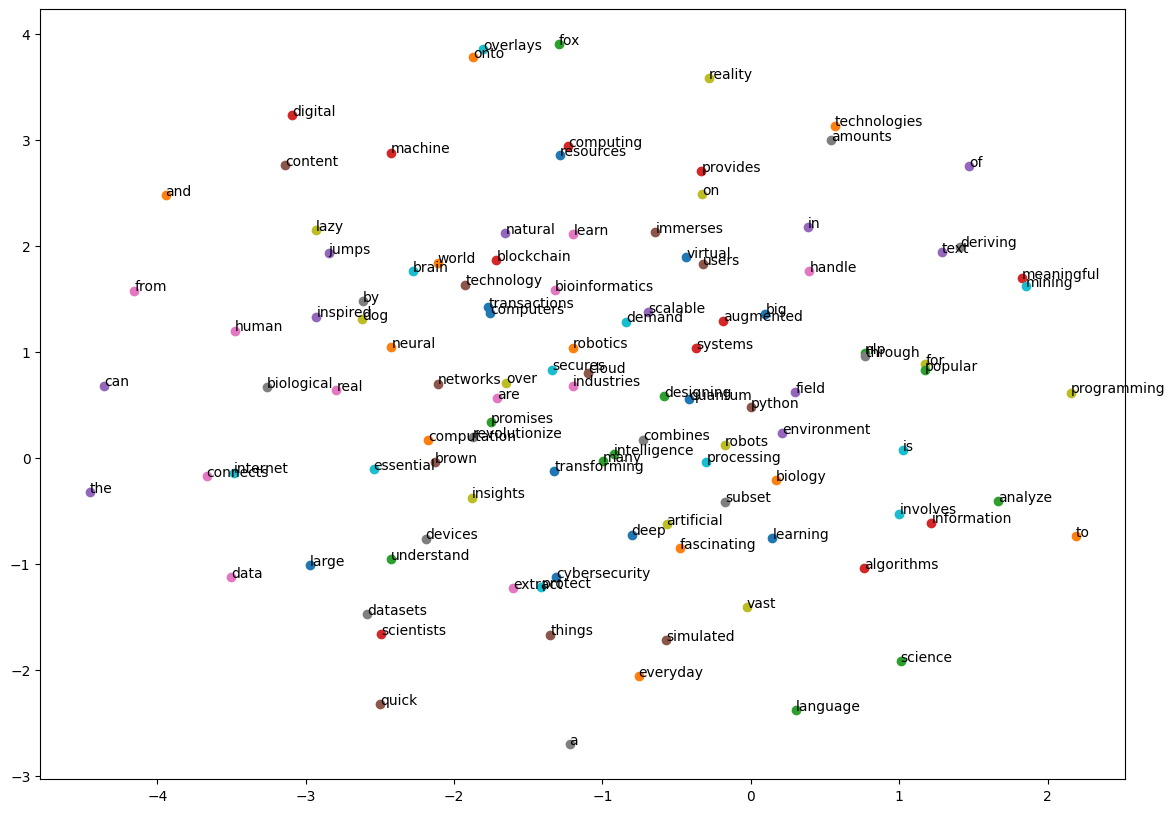

In [8]:
# visualizing the embedding using t-SNE
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

tsne = TSNE(n_components=2)
embedding_2d = tsne.fit_transform(W1)

plt.figure(figsize=(14, 10))
for word,i in word2index.items():
    plt.scatter(embedding_2d[i,0], embedding_2d[i,1],marker='o')
    plt.annotate(word,xy=(embedding_2d[i,0], embedding_2d[i,1]))

plt.show()